## MySQL Get Started

Python can be used in database applications. One of the most popular databases is MySQL.

## MySQL Database

To be able to experiment with the code examples in this tutorial, you should have MySQL installed on your computer.

You can download a free MySQL database at https://www.mysql.com/downloads/.

## Install MySQL Driver

Python needs a MySQL driver to access the MySQL database. In this tutorial we will use the driver "MySQL Connector".

We recommend that you use PIP to install "MySQL Connector". PIP is most likely already installed in your Python environment.

Navigate your command line to the location of PIP, and type the following :

## Download and install MySQL Connector

C:\Users\Your Name\AppData\Local\Programs\Python\Python36-32\Scripts>python -m pip install mysql-connector-python

**Now you have downloaded and installed a MySQL driver.**

## Test MySQL Connector

To test if the installation was successful, or if you already have "MySQL Connector" installed, create a Python page with the following content.

In [1]:
# demo_mysql_test.py

import mysql.connector

If the above code was executed with no errors, "MySQL Connector" is installed and ready to be used.

## Create Connection

Start by creating a connection to the database.

Use the username and password from your MySQL database.

In [3]:
# demo_mysql_connection.py

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="gis.12345"
)

print(mydb)

Now you can start querying the database using SQL statements.

## MySQL Create Database

## Creating a Database

To create a database in MySQL, use the "CREATE DATABASE" statement.

In [5]:
# create a database named "mydatabase".

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="gis.12345"
)

mycursor = mydb.cursor()

mycursor.execute("CREATE DATABASE mydatabase")

If the above code was executed with no errors, you have successfully created a database.

## Check if Database Exists

You can check if a database exist by listing all databases in your system by using the "SHOW DATABASES" statement.

In [6]:
# Return a list of your system's databases.

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="gis.12345"
)

mycursor = mydb.cursor()

mycursor.execute("SHOW DATABASES")

for x in mycursor:
  print(x)

('fundamentalsofdatascience',)
('information_schema',)
('mydatabase',)
('mysql',)
('performance_schema',)
('webdb',)


Or you can try to access the database when making the connection:

In [7]:
# Try connecting to the database "mydatabase".

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="gis.12345",
  database="mydatabase"
)

If the database does not exist, you will get an error.

## MySQL Create Table

## Creating a Table

To create a table in MySQL, use the "CREATE TABLE" statement.

Make sure you define the name of the database when you create the connection.

In [8]:
# Create a table named "customers".

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="gis.12345",
  database="mydatabase"
)

mycursor = mydb.cursor()

mycursor.execute("CREATE TABLE customers (name VARCHAR(255), address VARCHAR(255))")

If the above code was executed with no errors, you have now successfully created a table.

## Check if Table Exists

You can check if a table exist by listing all tables in your database with the "SHOW TABLES" statement.

In [9]:
# Return a list of your system's databases.

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="gis.12345",
  database="mydatabase"
)

mycursor = mydb.cursor()

mycursor.execute("SHOW TABLES")

for x in mycursor:
  print(x)

('customers',)


## Primary Key

When creating a table, you should also create a column with a unique key for each record.

This can be done by defining a PRIMARY KEY.

We use the statement "INT AUTO_INCREMENT PRIMARY KEY" which will insert a unique number for each record. Starting at 1, and increased by one for each record.

In [10]:
# Create primary key when creating the table.

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="gis.12345",
  database="mydatabase"
)

mycursor = mydb.cursor()

mycursor.execute("CREATE TABLE customers (id INT AUTO_INCREMENT PRIMARY KEY, name VARCHAR(255), address VARCHAR(255))")

ProgrammingError: 1050 (42S01): Table 'customers' already exists

If the table already exists, use the ALTER TABLE keyword:

In [11]:
# Create primary key on an existing table.

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="gis.12345",
  database="mydatabase"
)

mycursor = mydb.cursor()

mycursor.execute("ALTER TABLE customers ADD COLUMN id INT AUTO_INCREMENT PRIMARY KEY")

## MySQL Insert Into Table

## Insert Into Table

To fill a table in MySQL, use the "INSERT INTO" statement.

In [13]:
# Insert a record in the "customers" table.

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="gis.12345",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "INSERT INTO customers (name, address) VALUES (%s, %s)"
val = ("John", "Highway 21")
mycursor.execute(sql, val)

mydb.commit()

print(mycursor.rowcount, "record inserted.")

1 record inserted.


Important!: Notice the statement: mydb.commit(). It is required to make the changes, otherwise no changes are made to the table.

## Insert Multiple Rows

To insert multiple rows into a table, use the executemany() method.

The second parameter of the executemany() method is a list of tuples, containing the data you want to insert.

In [14]:
# Fill the "customers" table with data.

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="gis.12345",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "INSERT INTO customers (name, address) VALUES (%s, %s)"
val = [
  ('Peter', 'Lowstreet 4'),
  ('Amy', 'Apple st 652'),
  ('Hannah', 'Mountain 21'),
  ('Michael', 'Valley 345'),
  ('Sandy', 'Ocean blvd 2'),
  ('Betty', 'Green Grass 1'),
  ('Richard', 'Sky st 331'),
  ('Susan', 'One way 98'),
  ('Vicky', 'Yellow Garden 2'),
  ('Ben', 'Park Lane 38'),
  ('William', 'Central st 954'),
  ('Chuck', 'Main Road 989'),
  ('Viola', 'Sideway 1633')
]

mycursor.executemany(sql, val)

mydb.commit()

print(mycursor.rowcount, "was inserted.")

13 was inserted.


## Get Inserted ID

You can get the id of the row you just inserted by asking the cursor object.

Note: If you insert more than one row, the id of the last inserted row is returned.

In [15]:
# Insert one row, and return the ID.

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="gis.12345",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "INSERT INTO customers (name, address) VALUES (%s, %s)"
val = ("Michelle", "Blue Village")
mycursor.execute(sql, val)

mydb.commit()

print("1 record inserted, ID:", mycursor.lastrowid)

1 record inserted, ID: 15


## MySQL Select From

## Select From a Table

To select from a table in MySQL, use the "SELECT" statement.

In [16]:
# Select all records from the "customers" table, and display the result.

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="gis.12345",
  database="mydatabase"
)

mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM customers")

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

('John', 'Highway 21', 1)
('Peter', 'Lowstreet 4', 2)
('Amy', 'Apple st 652', 3)
('Hannah', 'Mountain 21', 4)
('Michael', 'Valley 345', 5)
('Sandy', 'Ocean blvd 2', 6)
('Betty', 'Green Grass 1', 7)
('Richard', 'Sky st 331', 8)
('Susan', 'One way 98', 9)
('Vicky', 'Yellow Garden 2', 10)
('Ben', 'Park Lane 38', 11)
('William', 'Central st 954', 12)
('Chuck', 'Main Road 989', 13)
('Viola', 'Sideway 1633', 14)
('Michelle', 'Blue Village', 15)


Note: We use the fetchall() method, which fetches all rows from the last executed statement.

## Selecting Columns

To select only some of the columns in a table, use the "SELECT" statement followed by the column name(s).

In [17]:
# Select only the name and address columns.

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="gis.12345",
  database="mydatabase"
)

mycursor = mydb.cursor()

mycursor.execute("SELECT name, address FROM customers")

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

('John', 'Highway 21')
('Peter', 'Lowstreet 4')
('Amy', 'Apple st 652')
('Hannah', 'Mountain 21')
('Michael', 'Valley 345')
('Sandy', 'Ocean blvd 2')
('Betty', 'Green Grass 1')
('Richard', 'Sky st 331')
('Susan', 'One way 98')
('Vicky', 'Yellow Garden 2')
('Ben', 'Park Lane 38')
('William', 'Central st 954')
('Chuck', 'Main Road 989')
('Viola', 'Sideway 1633')
('Michelle', 'Blue Village')


## Using the fetchone() Method

If you are only interested in one row, you can use the fetchone() method.

The fetchone() method will return the first row of the result.

In [18]:
# Fetch only one row.

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="gis.12345",
  database="mydatabase"
)

mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM customers")

myresult = mycursor.fetchone()

print(myresult)

('John', 'Highway 21', 1)


## MySQL Where

## Select With a Filter

When selecting records from a table, you can filter the selection by using the "WHERE" statement.

In [19]:
# Select record(s) where the address is "Park Lane 38": result.

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="gis.12345",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "SELECT * FROM customers WHERE address ='Park Lane 38'"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

('Ben', 'Park Lane 38', 11)


## Wildcard Characters

You can also select the records that starts, includes, or ends with a given letter or phrase.

Use the %  to represent wildcard characters.

In [20]:
# Select records where the address contains the word "way".

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="gis.12345",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "SELECT * FROM customers WHERE address LIKE '%way%'"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

('John', 'Highway 21', 1)
('Susan', 'One way 98', 9)
('Viola', 'Sideway 1633', 14)


## Prevent SQL Injection

When query values are provided by the user, you should escape the values.

This is to prevent SQL injections, which is a common web hacking technique to destroy or misuse your database.

The mysql.connector module has methods to escape query values.

In [21]:
# Escape query values by using the placholder %s method.

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="gis.12345",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "SELECT * FROM customers WHERE address = %s"
adr = ("Yellow Garden 2", )

mycursor.execute(sql, adr)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

('Vicky', 'Yellow Garden 2', 10)


## MySQL Order By

## Sort the Result

Use the ORDER BY statement to sort the result in ascending or descending order.

The ORDER BY keyword sorts the result ascending by default. To sort the result in descending order, use the DESC keyword.

In [22]:
# Sort the result alphabetically by name: result.

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="gis.12345",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "SELECT * FROM customers ORDER BY name"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

('Amy', 'Apple st 652', 3)
('Ben', 'Park Lane 38', 11)
('Betty', 'Green Grass 1', 7)
('Chuck', 'Main Road 989', 13)
('Hannah', 'Mountain 21', 4)
('John', 'Highway 21', 1)
('Michael', 'Valley 345', 5)
('Michelle', 'Blue Village', 15)
('Peter', 'Lowstreet 4', 2)
('Richard', 'Sky st 331', 8)
('Sandy', 'Ocean blvd 2', 6)
('Susan', 'One way 98', 9)
('Vicky', 'Yellow Garden 2', 10)
('Viola', 'Sideway 1633', 14)
('William', 'Central st 954', 12)


## ORDER BY DESC

Use the DESC keyword to sort the result in a descending order.

In [23]:
# Sort the result reverse alphabetically by name.

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="gis.12345",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "SELECT * FROM customers ORDER BY name DESC"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

('William', 'Central st 954', 12)
('Viola', 'Sideway 1633', 14)
('Vicky', 'Yellow Garden 2', 10)
('Susan', 'One way 98', 9)
('Sandy', 'Ocean blvd 2', 6)
('Richard', 'Sky st 331', 8)
('Peter', 'Lowstreet 4', 2)
('Michelle', 'Blue Village', 15)
('Michael', 'Valley 345', 5)
('John', 'Highway 21', 1)
('Hannah', 'Mountain 21', 4)
('Chuck', 'Main Road 989', 13)
('Betty', 'Green Grass 1', 7)
('Ben', 'Park Lane 38', 11)
('Amy', 'Apple st 652', 3)


## MySQL Delete From By

## Delete Record

You can delete records from an existing table by using the "DELETE FROM" statement.

In [24]:
# Delete any record where the address is "Mountain 21".

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="gis.12345",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "DELETE FROM customers WHERE address = 'Mountain 21'"

mycursor.execute(sql)

mydb.commit()

print(mycursor.rowcount, "record(s) deleted")

1 record(s) deleted


Important!: Notice the statement: mydb.commit(). It is required to make the changes, otherwise no changes are made to the table.

Notice the WHERE clause in the DELETE syntax: The WHERE clause specifies which record(s) that should be deleted. If you omit the WHERE clause, all records will be deleted!

## Prevent SQL Injection

It is considered a good practice to escape the values of any query, also in delete statements.

This is to prevent SQL injections, which is a common web hacking technique to destroy or misuse your database.

The mysql.connector module uses the placeholder %s to escape values in the delete statement.

In [25]:
# Escape values by using the placeholder %s method.

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="gis.12345",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "DELETE FROM customers WHERE address = %s"
adr = ("Yellow Garden 2", )

mycursor.execute(sql, adr)

mydb.commit()

print(mycursor.rowcount, "record(s) deleted")

1 record(s) deleted


## MySQL Drop Table

## Delete a Table

You can delete an existing table by using the "DROP TABLE" statement.

In [26]:
# Delete the table "customers".

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="gis.12345",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "DROP TABLE customers"

mycursor.execute(sql)

## Drop Only if Exist

If the the table you want to delete is already deleted, or for any other reason does not exist, you can use the IF EXISTS keyword to avoid getting an error.

In [27]:
# Delete the table "customers" if it exists.

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="gis.12345",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "DROP TABLE IF EXISTS customers"

mycursor.execute(sql)

## MySQL Update Table

## Update Table

You can update existing records in a table by using the "UPDATE" statement:

In [28]:
# Overwrite the address column from "Valley 345" to "Canyon 123".

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="gis.12345",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "UPDATE customers SET address = 'Canyon 123' WHERE address = 'Valley 345'"

mycursor.execute(sql)

mydb.commit()

print(mycursor.rowcount, "record(s) affected")

ProgrammingError: 1146 (42S02): Table 'mydatabase.customers' doesn't exist

Important!: Notice the statement: mydb.commit(). It is required to make the changes, otherwise no changes are made to the table.

Notice the WHERE clause in the UPDATE syntax: The WHERE clause specifies which record or records that should be updated. If you omit the WHERE clause, all records will be updated!

## Prevent SQL Injection

It is considered a good practice to escape the values of any query, also in update statements.

This is to prevent SQL injections, which is a common web hacking technique to destroy or misuse your database.

The mysql.connector module uses the placeholder %s to escape values in the delete statement:

In [29]:
# Escape values by using the placeholder %s method.

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="gis.12345",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "UPDATE customers SET address = %s WHERE address = %s"
val = ("Valley 345", "Canyon 123")

mycursor.execute(sql, val)

mydb.commit()

print(mycursor.rowcount, "record(s) affected")

ProgrammingError: 1146 (42S02): Table 'mydatabase.customers' doesn't exist

## MySQL Limit

## Limit the Result

You can limit the number of records returned from the query, by using the "LIMIT" statement:

In [30]:
# Select the 5 first records in the "customers" table.

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="gis.12345",
  database="mydatabase"
)

mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM customers LIMIT 5")

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

ProgrammingError: 1146 (42S02): Table 'mydatabase.customers' doesn't exist

## Start From Another Position

If you want to return five records, starting from the third record, you can use the "OFFSET" keyword:

In [31]:
# Start from position 3, and return 5 records.

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="gis.12345",
  database="mydatabase"
)

mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM customers LIMIT 5 OFFSET 2")

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

ProgrammingError: 1146 (42S02): Table 'mydatabase.customers' doesn't exist

## MySQL Join

## Join Two or More Tables

You can combine rows from two or more tables, based on a related column between them, by using a JOIN statement.

Consider you have a "users" table and a "products" table:

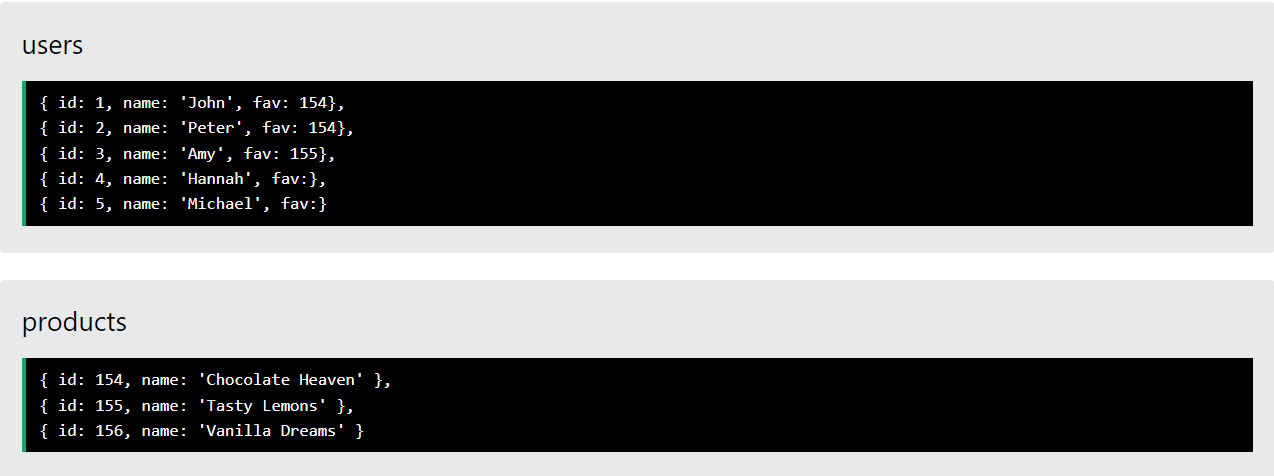

These two tables can be combined by using users' fav field and products' id field.

In [ ]:
# Join users and products to see the name of the users favorite product.

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="gis.12345",
  database="mydatabase"
)

mycursor = mydb.cursor()

sql = "SELECT \
  users.name AS user, \
  products.name AS favorite \
  FROM users \
  INNER JOIN products ON users.fav = products.id"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

Note: You can use JOIN instead of INNER JOIN. They will both give you the same result.

## LEFT JOIN

In the example above, Hannah, and Michael were excluded from the result, that is because INNER JOIN only shows the records where there is a match.

If you want to show all users, even if they do not have a favorite product, use the LEFT JOIN statement.

In [ ]:
# Select all users and their favorite product.

sql = "SELECT \
  users.name AS user, \
  products.name AS favorite \
  FROM users \
  LEFT JOIN products ON users.fav = products.id"

## RIGHT JOIN

If you want to return all products, and the users who have them as their favorite, even if no user have them as their favorite, use the RIGHT JOIN statement.

In [ ]:
# Select all products, and the user(s) who have them as their favorite.

sql = "SELECT \
  users.name AS user, \
  products.name AS favorite \
  FROM users \
  RIGHT JOIN products ON users.fav = products.id"

Note: Hannah and Michael, who have no favorite product, are not included in the result.

## Practice

- Install mysql-connector python

In [1]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


## Practice

- Connect to MySQL

In [2]:
import mysql.connector as connection

try:
    mydb = connection.connect(host="localhost", user="root", passwd="mysql",use_pure=True)
    # check if the connection is established
    print(mydb.is_connected())
    mydb.close()
except Exception as e:
    print(str(e))

1045 (28000): Access denied for user 'root'@'localhost' (using password: YES)


In [3]:
import mysql.connector as connection

try:
    mydb = connection.connect(host="localhost", 
                              user="root", 
                              passwd="gis.12345",use_pure=True)
    # check if the connection is established
    print(mydb.is_connected())
    mydb.close()
except Exception as e:
    print(str(e))

True


In [12]:
import mysql.connector as connection

In [13]:
connection.connect(host="localhost", 
                              user="root", 
                              passwd="gis.12345",use_pure=True)

## Practice

- Check List of Databases

In [11]:
import mysql.connector as connection

try:
    mydb = connection.connect(host="localhost",user="root", passwd="gis.12345",use_pure=True)
    # check if the connection is established

    query = "SHOW DATABASES"

    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    print(cursor.fetchall())

except Exception as e:
    mydb.close()
    print(str(e))

[('information_schema',), ('mysql',), ('performance_schema',)]


In [1]:
import mysql.connector as connection

In [2]:
conn = connection.connect(host="localhost",
                          user="root", 
                          passwd="gis.12345",
                          use_pure=True)

In [3]:
cur = conn.cursor()

In [4]:
cur

In [5]:
cur.execute("show databases")

In [6]:
type(cur.execute("show databases"))

InternalError: Unread result found

In [7]:
res = cur.fetchall()

In [8]:
type(res)

list

In [9]:
res

[('information_schema',), ('mysql',), ('performance_schema',)]

In [10]:
for i in res:
    print(i[0])

information_schema
mysql
performance_schema


## Practice

- Create Databases

In [ ]:
import mysql.connector as connection

try:
    mydb = connection.connect(host="localhost", user="root", passwd="gis.12345",use_pure=True)
    # check if the connection is established
    print(mydb.is_connected())

    query = "Create database Student1; Create database Student2; Create database Student3;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    print("Database Created!!")
    mydb.close()
except Exception as e:
    mydb.close()
    print(str(e))

## Practice

- Create Table in Databases

In [ ]:
import mysql.connector as connection

try:
    mydb = connection.connect(host="localhost", database = 'Student1',user="root", passwd="gis.12345",use_pure=True)
    # check if the connection is established
    print(mydb.is_connected())

    query = "CREATE TABLE StudentDetails (Studentid INT(10) AUTO_INCREMENT PRIMARY KEY,FirstName VARCHAR(60)," \
            "LastName VARCHAR(60), RegistrationDate DATE,Class Varchar(20), Section Varchar(10))"

    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    print("Table Created!!")
    mydb.close()
except Exception as e:
    mydb.close()
    print(str(e))

In [ ]:
mydb = connection.connect(host="localhost", 
                          database = 'Student2',
                          user="root", 
                          passwd="gis.12345",use_pure=True)

In [ ]:
mydb.is_connected()

In [ ]:
cur = mydb.cursor()

In [ ]:
cur.execute("create table Test1(x1 INT(5), x2 VARCHAR(20), x3 DATE)")

In [ ]:
mydb.close()

## Practice

- Insert Values to Table

In [ ]:
import mysql.connector as connection

try:
    mydb = connection.connect(host="localhost", 
                              database = 'Student1',
                              user="root", 
                              passwd="gis.12345",
                              use_pure=True)
    # check if the connection is established
    print(mydb.is_connected())
    query = "INSERT INTO StudentDetails VALUES ('1132','Sachin','Kumar','1997-11-11','Eleventh','A')"

    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    print("Values inserted into the table!!")
    mydb.commit()
    mydb.close()
except Exception as e:
    mydb.close()
    print(str(e))

In [ ]:
import mysql.connector as connection
mydb = connection.connect(host="localhost", 
                          database = 'Student2',
                          user="root", 
                          passwd="gis.12345",use_pure=True)

In [ ]:
cur = mydb.cursor()

In [ ]:
cur.execute("insert into Test1 values(1001, 'Siddharth', '15-05-2021')")

In [ ]:
cur.execute("insert into Test1 values(1001, 'Siddharth', '2021-05-15')") #yyyy-mm-dd

In [ ]:
mydb.commit()

In [ ]:
cur.execute("insert into Test1 values(1002, 'Siddharth', '2021-05-15')") #yyyy-mm-dd

In [ ]:
cur.execute("insert into Test1 values(1001, 'Siddharth', '2021-05-15')") #yyyy-mm-dd

In [ ]:
cur.execute("insert into Test1 values(1001, 'Siddharth', '2021-05-15')") #yyyy-mm-dd

In [ ]:
cur.execute("insert into Test1 values(1001, 'Siddharth', '2021-05-15')") #yyyy-mm-dd

In [ ]:
cur.execute("insert into Test1 values(1001, 'Siddharth', '2021-05-15')") #yyyy-mm-dd
cur.execute("insert into Test1 values(1001, 'Siddharth', '2021-05-15')") #yyyy-mm-dd
cur.execute("insert into Test1 values(1001, 'Siddharth', '2021-05-15')") #yyyy-mm-dd
cur.execute("insert into Test1 values(1001, 'Siddharth', '2021-05-15')") #yyyy-mm-dd
cur.execute("insert into Test1 values(1001, 'Siddharth', '2021-05-15')") #yyyy-mm-dd
cur.execute("insert into Test1 values(1001, 'Siddharth', '2021-05-15')") #yyyy-mm-dd

cur.execute("insert into Test1 values(1001, 'Siddharth', '2021-05-15')") #yyyy-mm-dd
cur.execute("insert into Test1 values(1001, 'Siddharth', '2021-05-15')") #yyyy-mm-dd
cur.execute("insert into Test1 values(1001, 'Siddharth', '2021-05-15')") #yyyy-mm-dd
cur.execute("insert into Test1 values(1001, 'Siddharth', '2021-05-15')") #yyyy-mm-dd

In [ ]:
mydb.commit()

## Practice

- Fetch Data from the Database

In [ ]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'Student1',
                              user="root", passwd="gis.12345",use_pure=True)
    
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select * from StudentDetails;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

In [ ]:
import mysql.connector as connection

try:
    mydb = connection.connect(host="localhost", database = 'Student2',
                              user="root", passwd="gis.12345",use_pure=True)
    
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select * from Test1;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

In [ ]:
import mysql.connector as connection

mydb = connection.connect(host="localhost", database = 'Student2',
                              user="root", passwd="gis.12345",use_pure=True)
    

In [ ]:
query = "Select * from Test1;"
cursor = mydb.cursor() #create a cursor to execute queries
cursor.execute(query)

In [ ]:
f = cursor.fetchall()
f

In [ ]:
type(f)

In [ ]:
for i in f:
    print(i)

## Practice

- Select into Data Frame

In [ ]:
import mysql.connector as connection
import pandas as pandas

try:

    mydb = connection.connect(host="localhost", database='Student2', user="root", passwd="gis.12345", use_pure=True)
    # check if the connection is established
    print(mydb.is_connected())
    query = "Select * from Test1;"
    result_dataFrame = pandas.read_sql(query,mydb)
    print(result_dataFrame)

    mydb.close()  # close the connection

except Exception as e:
    #mydb.close()
    print(str(e))

In [ ]:
import mysql.connector as connection
import pandas as pandas

try:

    mydb = connection.connect(host="localhost", database='Student2', user="root", passwd="gis.12345", use_pure=True)
    # check if the connection is established
    print(mydb.is_connected())
    query = "Select x1,x2 from Test1;"
    result_dataFrame = pandas.read_sql(query,mydb)
    print(result_dataFrame)

    mydb.close()  # close the connection

except Exception as e:
    #mydb.close()
    print(str(e))

In [ ]:
import mysql.connector as connection
import pandas as pandas

try:

    mydb = connection.connect(host="localhost", database='Student2', user="root", passwd="gis.12345", use_pure=True)
    # check if the connection is established
    print(mydb.is_connected())
    query = "Select x3 from Test1;"
    result_dataFrame = pandas.read_sql(query,mydb)
    print(result_dataFrame)

    mydb.close()  # close the connection

except Exception as e:
    #mydb.close()
    print(str(e))

In [ ]:
import mysql.connector as connection
import pandas as pandas

try:

    mydb = connection.connect(host="localhost", database='Student2', user="root", passwd="gis.12345", use_pure=True)
    # check if the connection is established
    print(mydb.is_connected())
    query = "Select x2, x2, x3 from Test1;"
    result_dataFrame = pandas.read_sql(query,mydb)
    print(result_dataFrame)

    mydb.close()  # close the connection

except Exception as e:
    #mydb.close()
    print(str(e))

In [ ]:
import mysql.connector as connection
import pandas as pandas

try:

    mydb = connection.connect(host="localhost", database='Student2', user="root", passwd="gis.12345", use_pure=True)
    # check if the connection is established
    print(mydb.is_connected())
    query = "Select x3,x2,x1 from Test1;"
    result_dataFrame = pandas.read_sql(query,mydb)
    print(result_dataFrame)

    mydb.close()  # close the connection

except Exception as e:
    #mydb.close()
    print(str(e))

## Practice

- Insert from File

In [ ]:
import mysql.connector as connection
import pandas as pandas
import csv

try:
    mydb = connection.connect(host="localhost", user="root", passwd="gis.12345",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    #create a new database
    query = "Create database GlassData2;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    print("Database Created!!")
    mydb.close() #close the connection

    #Establish a new connection to the database created above
    mydb = connection.connect(host="localhost", database = 'GlassData2',user="root", passwd="gis.12345", use_pure=True)

    #create a new table to store glass data
    query = "CREATE TABLE IF NOT EXISTS GlassData (Index_Number INT(10),RI float(10,5), Na float(10,5), Mg float(10,5),Al float(10,5)," \
            " Si float(10,5), K float(10,5), Ca float(10,5), Ba float(10,5), Fe float(10,5), Class INT(5))"
    cursor = mydb.cursor()  # create a cursor to execute queries
    cursor.execute(query)
    print("Table Created!!")

    #read from the file
    with open('glass.data', "r") as f:
        next(f)
        glass_data = csv.reader(f, delimiter="\n")
        for line in enumerate(glass_data):
            for list_ in (line[1]):
                cursor.execute('INSERT INTO GlassData values ({values})'.format(values=(list_)))
    print("Values inserted!!")
    mydb.commit()
    cursor.close()
    mydb.close()

except Exception as e:
    #mydb.close()
    print(str(e))

In [1]:
import os
os.getcwd()
os.chdir("D:\\INEURON\\Jupyter Notebooks\\19.2.MySQL\\")

In [2]:
import mysql.connector as connection
import pandas as pandas
import csv

try:
    mydb = connection.connect(host="localhost", user="root", passwd="gis.12345",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    #create a new database
    query = "Create database GlassData222;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    print("Database Created!!")
    mydb.close() #close the connection

    #Establish a new connection to the database created above
    mydb = connection.connect(host="localhost", database = 'GlassData222',user="root", passwd="gis.12345", use_pure=True)

    #create a new table to store glass data
    query = "CREATE TABLE IF NOT EXISTS GlassData (Index_Number INT(10),RI float(10,5), Na float(10,5), Mg float(10,5),Al float(10,5)," \
            " Si float(10,5), K float(10,5), Ca float(10,5), Ba float(10,5), Fe float(10,5), Class INT(5))"
    cursor = mydb.cursor()  # create a cursor to execute queries
    cursor.execute(query)
    print("Table Created!!")

    #read from the file
    with open('glass.data', "r") as data:
        next(data)
        data_csv = csv.reader(data, delimiter="\n")
        print(data_csv)
        for j in data_csv:
            cursor.execute('INSERT INTO GlassData values ({values})'.format(values=str(j[0])))
    print("Values inserted!!")
    mydb.commit()
    cursor.close()
    mydb.close()

except Exception as e:
    #mydb.close()
    print(str(e))

True
Database Created!!
Table Created!!
Values inserted!!


In [ ]:
mydb = connection.connect(host="localhost", user="root", passwd="gis.12345",use_pure=True)
#check if the connection is established
print(mydb.is_connected())
#create a new database
query = "Create database GlassData2;"
cursor = mydb.cursor() #create a cursor to execute queries
cursor.execute(query)
print("Database Created!!")
mydb.close() #close the connection

#Establish a new connection to the database created above
mydb = connection.connect(host="localhost", database = 'GlassData2',user="root", passwd="gis.12345", use_pure=True)

#create a new table to store glass data
query = "CREATE TABLE IF NOT EXISTS GlassData (Index_Number INT(10),RI float(10,5), Na float(10,5), Mg float(10,5),Al float(10,5)," \
            " Si float(10,5), K float(10,5), Ca float(10,5), Ba float(10,5), Fe float(10,5), Class INT(5))"
cursor = mydb.cursor()  # create a cursor to execute queries
cursor.execute(query)
print("Table Created!!")

In [ ]:
with open('glass.data', "r") as data:
        next(data)
        data_csv = csv.reader(data, delimiter="\n")
        print(data_csv)
        for i in enumerate(data_csv):
            print(i)
            for j in i[1]:
                cursor.execute('INSERT INTO GlassData values ({values})'.format(values=(list_)))
print("Values inserted!!")
mydb.commit()  

## Practice

- Update Table

In [ ]:
import mysql.connector as connection
import pandas as pandas

try:

    mydb = connection.connect(host="localhost", database='Student1', user="root", passwd="gis.12345", use_pure=True)
    # check if the connection is established
    print(mydb.is_connected())
    query = "UPDATE studentdetails SET FirstName = 'Kumar', LastName = 'Gaurav' WHERE Studentid = 1132"
    cursor = mydb.cursor()  # create a cursor to execute queries
    cursor.execute(query)
    mydb.commit()

    #let's check if the value is updated in the table.
    query = "Select * from studentdetails where Studentid=1132;"
    cursor = mydb.cursor()  # create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)

    mydb.close()  # close the connection

except Exception as e:
    #mydb.close()
    print(str(e))

## Practice

- Delete from Table

In [ ]:
import mysql.connector as connection

try:

    mydb = connection.connect(host="localhost", 
                              database='Student1', 
                              user="root", 
                              passwd="gis.12345", 
                              use_pure=True)
    # check if the connection is established
    print(mydb.is_connected())
    query = "DELETE FROM studentdetails WHERE Studentid = 1132"
    cursor = mydb.cursor()  # create a cursor to execute queries
    cursor.execute(query)
    mydb.commit()

    #let's check if the value is updated in the table.
    query = "Select * from studentdetails where Studentid=1132;"
    cursor = mydb.cursor()  # create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)

    mydb.close()  # close the connection

except Exception as e:
    #mydb.close()
    print(str(e))

In [ ]:
# Update Table

import mysql.connector as connection
import pandas as pandas

try:

    mydb = connection.connect(host="localhost", database='Student1', user="root", passwd="gis.12345", use_pure=True)
    # check if the connection is established
    print(mydb.is_connected())
    query = "UPDATE studentdetails SET FirstName = 'Kumar', LastName = 'Gaurav' WHERE Studentid = 1132"
    cursor = mydb.cursor()  # create a cursor to execute queries
    cursor.execute(query)
    mydb.commit()

    #let's check if the value is updated in the table.
    query = "Select * from studentdetails where Studentid=1132;"
    cursor = mydb.cursor()  # create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)

    mydb.close()  # close the connection

except Exception as e:
    #mydb.close()
    print(str(e))

# Delete from Table

import mysql.connector as connection

try:

    mydb = connection.connect(host="localhost", 
                              database='Student1', 
                              user="root", 
                              passwd="gis.12345", 
                              use_pure=True)
    # check if the connection is established
    print(mydb.is_connected())
    query = "DELETE FROM studentdetails WHERE Studentid = 1132"
    cursor = mydb.cursor()  # create a cursor to execute queries
    cursor.execute(query)
    mydb.commit()

    #let's check if the value is updated in the table.
    query = "Select * from studentdetails where Studentid=1132;"
    cursor = mydb.cursor()  # create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)

    mydb.close()  # close the connection

except Exception as e:
    #mydb.close()
    print(str(e))

## Sample Code for Database Operations using Classes and Objects

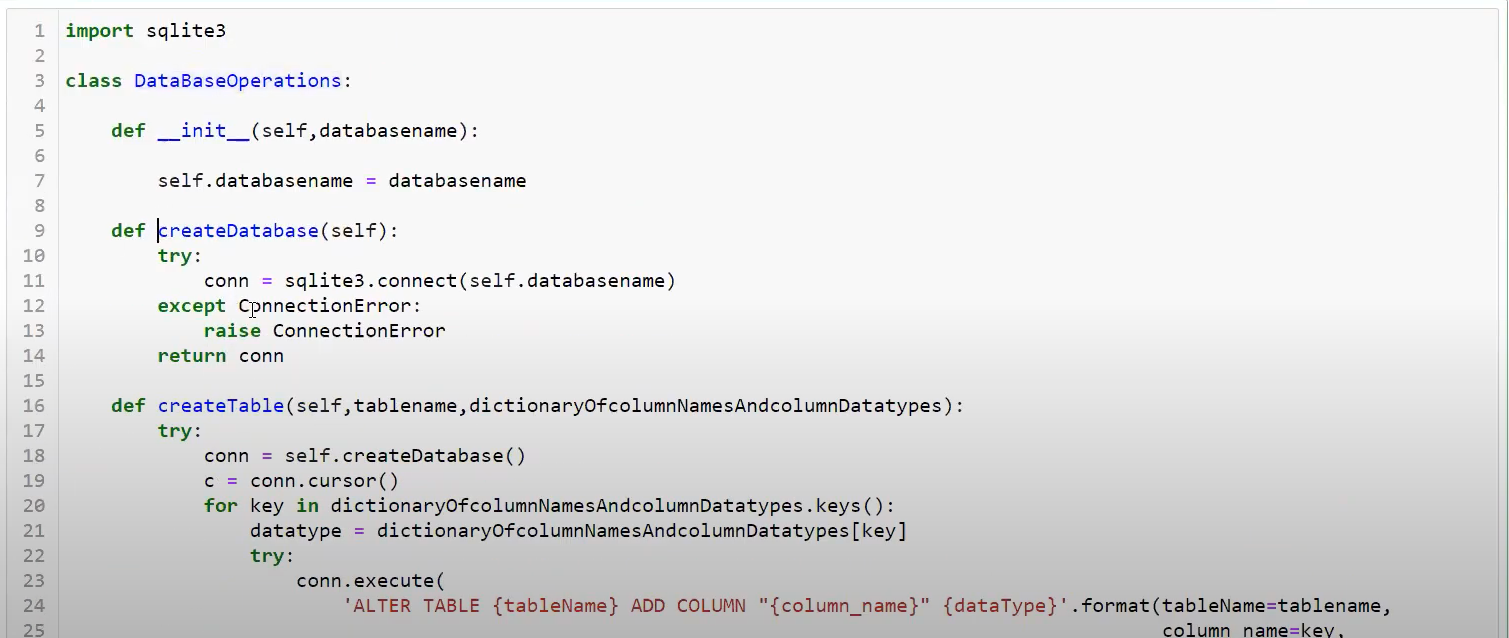

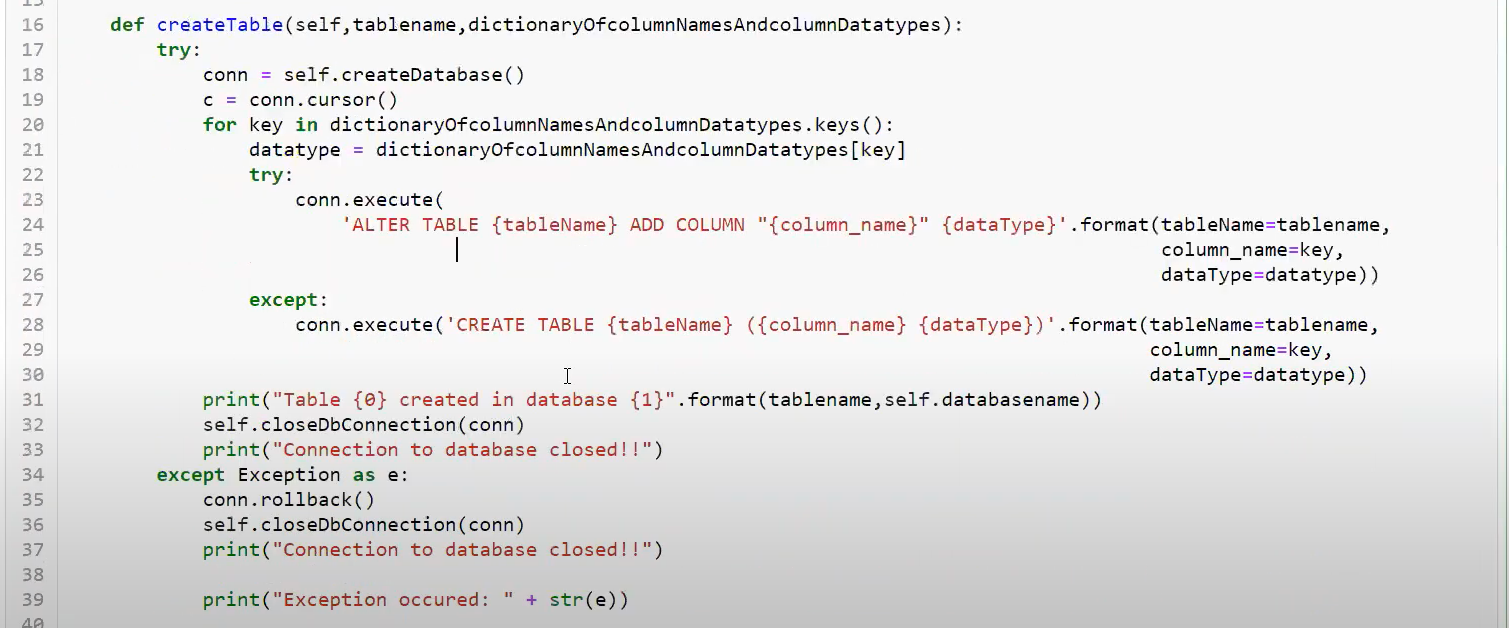

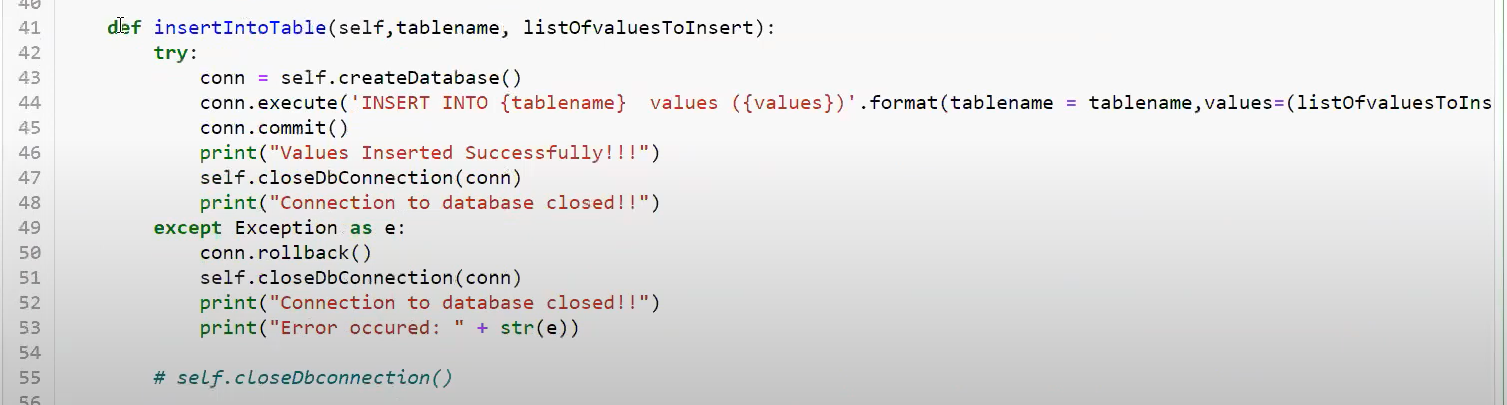

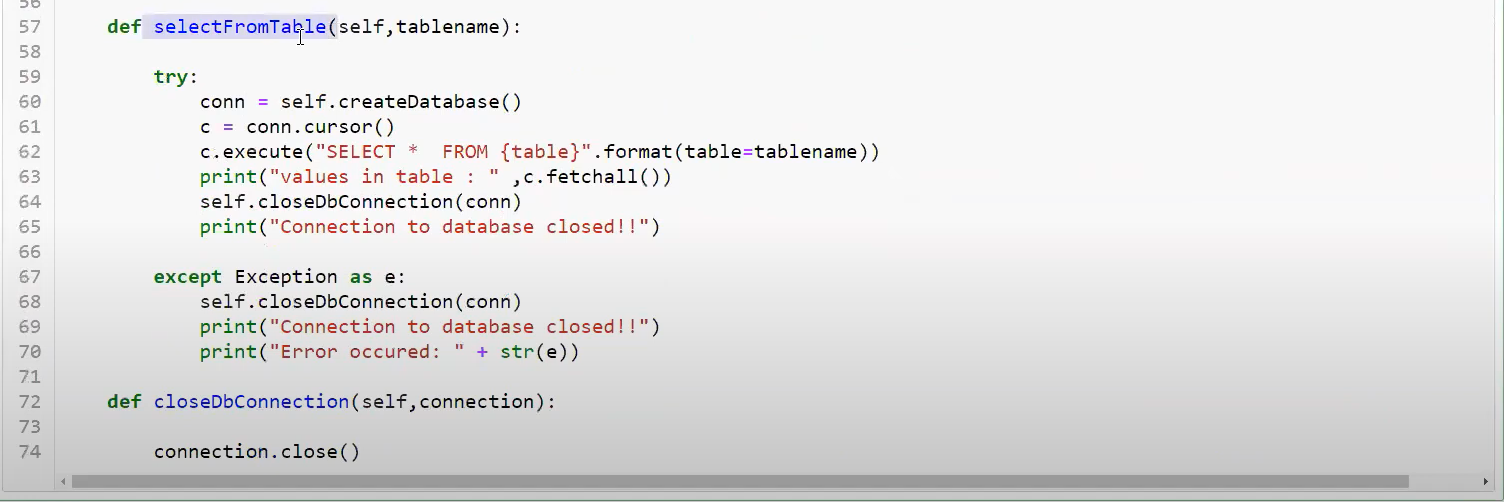

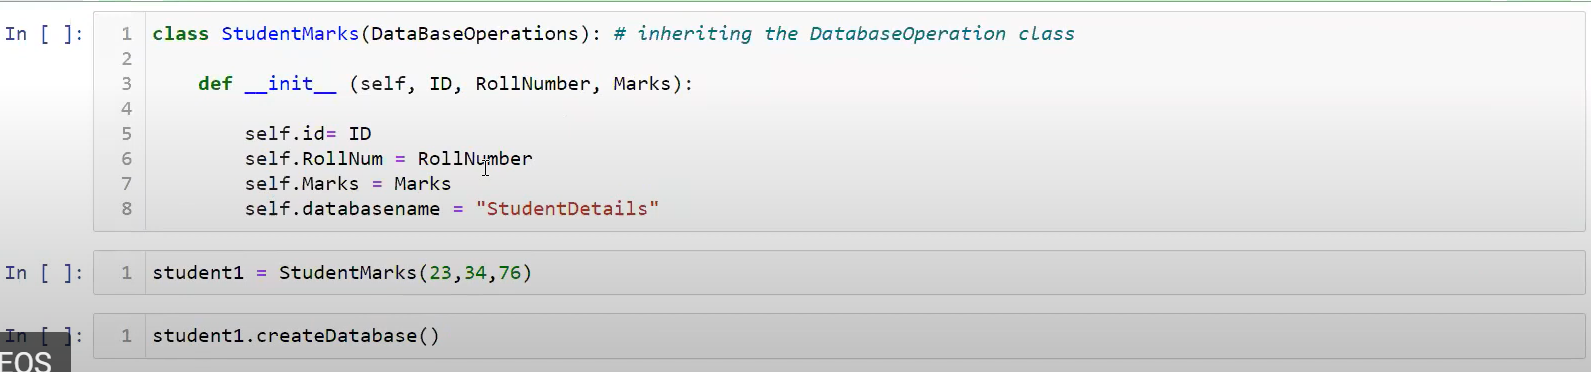